EN2550 Assignment 01

Index No.&nbsp;&nbsp;:&nbsp;190018V

Name&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:&nbsp;Abeywickrama K.C.S.

Github &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:&nbsp;https://github.com/KCSAbeywickrama/EN2550-Excercises/tree/master/Assignment_02

In [1]:
# imports
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def imshowBGR(img,ax=plt):
    ax.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

In [20]:
# q1

import numpy as np
from scipy . optimize import minimize,curve_fit
from scipy import linalg
import matplotlib . pyplot as plt
# np . random . seed ( 0 )
N = 100
half_n = N//2
r = 10
s = r /16
t = np . random . uniform (0 , 2*np . pi , half_n )
n = s*np . random . randn ( half_n )
x , y = ( r + n)*np . cos ( t ) , ( r + n)*np . sin ( t )
X_circ = np.hstack ( (x.reshape ( half_n , 1 ) , y.reshape( half_n , 1 ) ) )
m, b = -1, 2
x = np . linspace (-12, 12 , half_n )
y = m*x + b + s*np . random . randn ( half_n )
X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np . vstack ( ( X_circ , X_line ) )


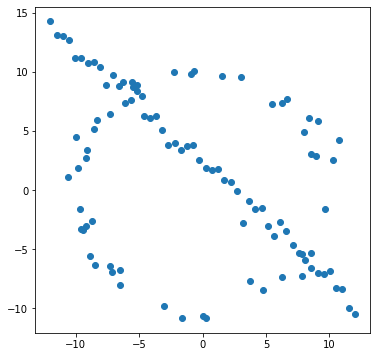

In [14]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
plt.scatter(X[:,0],X[:,1])

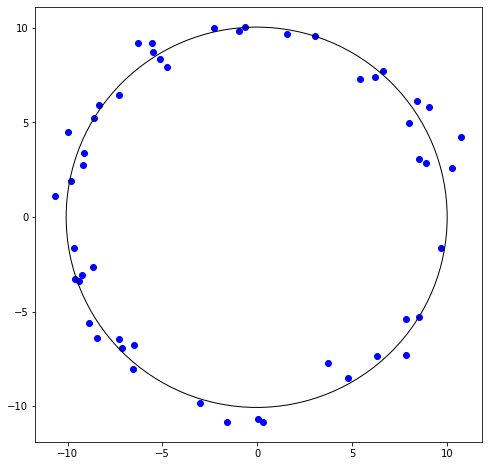

In [15]:
#! python
# == METHOD 1 ==
method_1 = 'algebraic'

points=X_circ
# coordinates of the barycenter
x,y=points[:,0],points[:,1]
x_m = np.mean(x)
y_m = np.mean(y)

# calculation of the reduced coordinates
u = x - x_m
v = y - y_m

# linear system defining the center (uc, vc) in reduced coordinates:
#    Suu * uc +  Suv * vc = (Suuu + Suvv)/2
#    Suv * uc +  Svv * vc = (Suuv + Svvv)/2
Suv  = np.sum(u*v)
Suu  = np.sum(u**2)
Svv  = np.sum(v**2)
Suuv = np.sum(u**2 * v)
Suvv = np.sum(u * v**2)
Suuu = np.sum(u**3)
Svvv = np.sum(v**3)

# Solving the linear system
A = np.array([ [ Suu, Suv ], [Suv, Svv]])
B = np.array([ Suuu + Suvv, Svvv + Suuv ])/2.0
uc, vc = linalg.solve(A, B)

xc_1 = x_m + uc
yc_1 = y_m + vc

# Calcul des distances au centre (xc_1, yc_1)
Ri_1     = np.sqrt((x-xc_1)**2 + (y-yc_1)**2)
R_1      = np.mean(Ri_1)
residu_1 = np.sum((Ri_1-R_1)**2)

fig,ax=plt.subplots(1,1,figsize=(8,8))   
ax.scatter(x,y,color='b')     

smpl_circle=plt.Circle((xc_1,yc_1),R_1,fill=False)

ax.add_patch(smpl_circle)

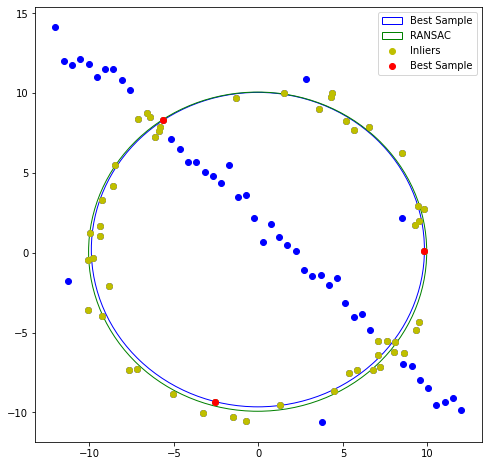

In [31]:
def get_circle(points,max_r):
    (x1,y1),(x2,y2),(x3,y3)=points
   
    a = (x2-x3)**2 + (y2-y3)**2
    b = (x3-x1)**2 + (y3-y1)**2
    c = (x1-x2)**2 + (y1-y2)**2   
    h = 2*(a*b + b*c + c*a) - (a*a + b*b + c*c)

    if(h<=np.finfo(float).eps): return None
    
    px = (a*(b+c-a)*x1 + b*(c+a-b)*x2 + c*(a+b-c)*x3) / h
    py = (a*(b+c-a)*y1 + b*(c+a-b)*y2 + c*(a+b-c)*y3) / h 
    ar = a**0.5
    br = b**0.5
    cr = c**0.5 
    r = ar*br*cr / ((ar+br+cr)*(-ar+br+cr)*(ar-br+cr)*(ar+br-cr))**0.5

    if(r>max_r): return None

    return (px,py),r

def fit_circle(points):
    x,y=points[:,0],points[:,1]
    x_m = np.mean(x)
    y_m = np.mean(y)
    
    u = x - x_m
    v = y - y_m
    
    Suv  = np.sum(u*v)
    Suu  = np.sum(u**2)
    Svv  = np.sum(v**2)
    Suuv = np.sum(u**2 * v)
    Suvv = np.sum(u * v**2)
    Suuu = np.sum(u**3)
    Svvv = np.sum(v**3)
    
    A = np.array([ [ Suu, Suv ], [Suv, Svv]])
    B = np.array([ Suuu + Suvv, Svvv + Suuv ])/2.0
    uc, vc = linalg.solve(A, B)

    xc = x_m + uc
    yc = y_m + vc

    ri = np.sqrt((x-xc)**2 + (y-yc)**2)
    r  = np.mean(ri)

    return (xc,yc),r
    

def get_inliers(points,cicrle,thres):
    center,r=cicrle
    tmp_diff_sqr=(points-np.array(center))**2
    r_difs=np.abs(np.sqrt(tmp_diff_sqr[:,0]+tmp_diff_sqr[:,1])-r)
    return points[r_difs<thres]

def get_match(points,thres):
    point_count=len(points)
    max_inlier_count=0
    max_r=(np.max(points)-np.min(points))/2
    for ittr in range(ittrs_limit):
        init_points=points[np.random.choice(point_count,3)]        
        circle=get_circle(init_points,max_r)
        if(circle):
            inliers=get_inliers(points,circle,thres)
            inlier_count=len(inliers)
            if inlier_count>max_inlier_count:
                match_circle,match_samples,match_inliers=circle,init_points,inliers            
                max_inlier_count=inlier_count
        
    return match_circle,match_samples,match_inliers

ittrs_limit=500
inlie_thres=1
(smpl_center,smpl_r),smpl_points,inliers=get_match(X,inlie_thres)
ransac_center,ransac_r=fit_circle(inliers)
 
fig,ax=plt.subplots(1,1,figsize=(8,8))   
ax.scatter(X[:,0],X[:,1],color='b')     

smpl_circle=plt.Circle(smpl_center,smpl_r,fill=False,color='b',label="Best Sample")
ransac_circle=plt.Circle(ransac_center,ransac_r,fill=False,color='g',label="RANSAC")
ax.add_patch(smpl_circle)
ax.add_patch(ransac_circle)

ax.scatter(inliers[:,0],inliers[:,1],color='y',label="Inliers")
ax.scatter(smpl_points[:,0],smpl_points[:,1],color='r',label="Best Sample")
ax.legend(fancybox=True)
  


In [27]:
rng=np.amax(X)
rng

14.16480123452809

C:\Users\csaso\AppData\Local\Temp\ipykernel_10768\614384470.py:9: RuntimeWarning: invalid value encountered in double_scalars
  px = (a*(b+c-a)*x1 + b*(c+a-b)*x2 + c*(a+b-c)*x3) / h
C:\Users\csaso\AppData\Local\Temp\ipykernel_10768\614384470.py:10: RuntimeWarning: invalid value encountered in double_scalars
  py = (a*(b+c-a)*y1 + b*(c+a-b)*y2 + c*(a+b-c)*y3) / h
C:\Users\csaso\AppData\Local\Temp\ipykernel_10768\614384470.py:14: RuntimeWarning: invalid value encountered in double_scalars
  r = ar*br*cr / ((ar+br+cr)*(-ar+br+cr)*(ar-br+cr)*(ar+br-cr))**0.5


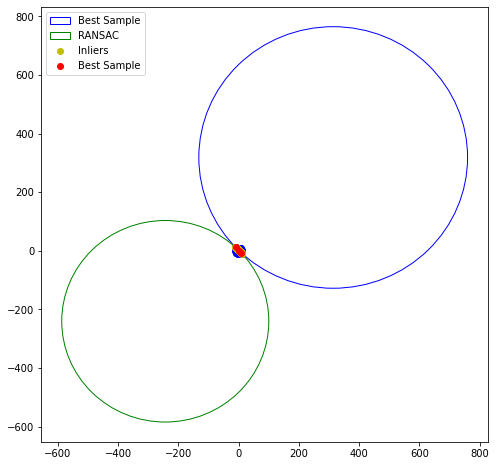

In [24]:
def get_circle(points):
    (x1,y1),(x2,y2),(x3,y3)=points
   
    a = (x2-x3)**2 + (y2-y3)**2
    b = (x3-x1)**2 + (y3-y1)**2
    c = (x1-x2)**2 + (y1-y2)**2   
    h = 2*(a*b + b*c + c*a) - (a*a + b*b + c*c)
    
    px = (a*(b+c-a)*x1 + b*(c+a-b)*x2 + c*(a+b-c)*x3) / h
    py = (a*(b+c-a)*y1 + b*(c+a-b)*y2 + c*(a+b-c)*y3) / h 
    ar = a**0.5
    br = b**0.5
    cr = c**0.5 
    r = ar*br*cr / ((ar+br+cr)*(-ar+br+cr)*(ar-br+cr)*(ar+br-cr))**0.5

    return (px,py),r

def get_inliers(points,center,r,thres):
    tmp_diff_sqr=(points-np.array(center))**2
    r_difs=np.abs(np.sqrt(tmp_diff_sqr[:,0]+tmp_diff_sqr[:,1])-r)
    return points[r_difs<thres]

def get_match(points,thres):
    point_count=len(points)
    max_inlier_count=0
    for ittr in range(ittrs_limit):
        init_points=points[np.random.choice(point_count,3)]        
        circle=get_circle(init_points)
        # if(circle):
        inliers=get_inliers(points,circle[0],circle[1],thres)
        inlier_count=len(inliers)
        if inlier_count>max_inlier_count:
            match_circle=circle
            match_inliers=inliers
            match_samples=init_points
            max_inlier_count=inlier_count
        
    return match_circle,match_samples,match_inliers

ittrs_limit=100
inlie_thres=1
(smpl_center,smpl_r),smpl_points,smpl_inliers=get_match(X,inlie_thres)
(ransac_center,ransac_r),ransac_points,ransac_inliers=get_match(smpl_inliers,inlie_thres)
 
fig,ax=plt.subplots(1,1,figsize=(8,8))   
ax.scatter(X[:,0],X[:,1],color='b')     

smpl_circle=plt.Circle(smpl_center,smpl_r,fill=False,color='b',label="Best Sample")
ransac_circle=plt.Circle(ransac_center,ransac_r,fill=False,color='g',label="RANSAC")
ax.add_patch(smpl_circle)
ax.add_patch(ransac_circle)

ax.scatter(smpl_inliers[:,0],smpl_inliers[:,1],color='y',label="Inliers")
ax.scatter(smpl_points[:,0],smpl_points[:,1],color='r',label="Best Sample")
ax.legend(fancybox=True)
  

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\calib3d\src\fundam.cpp:378: error: (-5:Bad argument) The input arrays should be 2D or 3D point sets in function 'cv::findHomography'


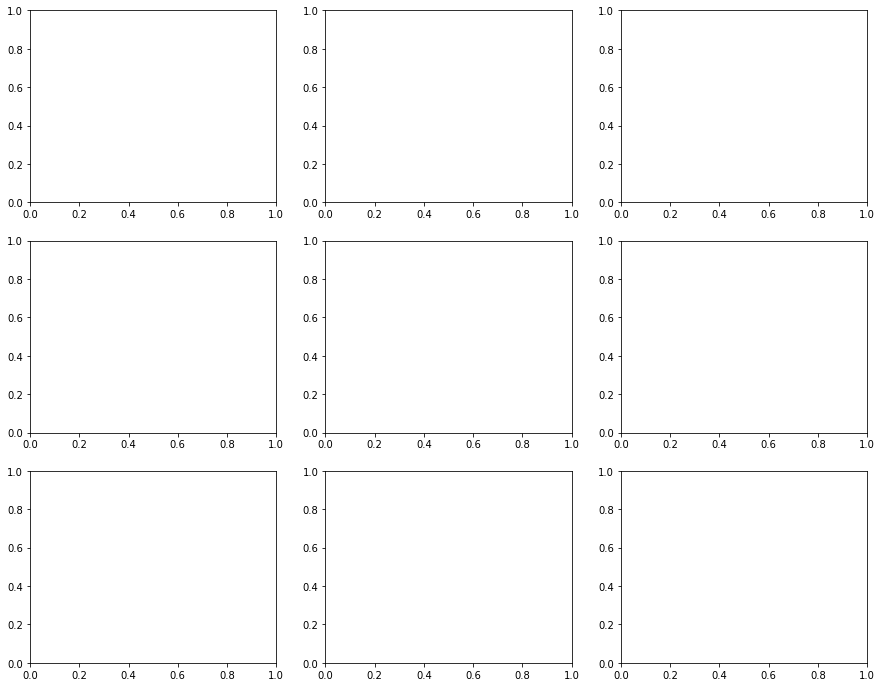

In [22]:
# q2

def mouse_click(e,x,y,f,p):   
    if e==cv.EVENT_LBUTTONDOWN:        
        g_points_des.append((x,y))

def get_points(img):
    global g_points_des
    g_points_des=[]
    cv.namedWindow('img')
    cv.setMouseCallback('img',mouse_click)
    cv.imshow('img',img)
    cv.waitKey(0)
    cv.destroyAllWindows()
    return g_points_des

def display(img_dst,img_src,img_out,i):
    cv.namedWindow('img')
    cv.imshow('img',img_out)
    key=cv.waitKey(0)
    cv.destroyAllWindows()
    imshowBGR(img_dst,ax[i,0])
    ax[i,0].set_title('Architectural Image')
    imshowBGR(img_src,ax[i,1])
    ax[i,1].set_title('Flag')
    imshowBGR(img_out,ax[i,2])
    ax[i,2].set_title('Superimposed')


# i=1

fig,ax=plt.subplots(3,3,figsize=(15,12))

for i in range(1,4):
# while True:
    # points_des=[(127, 145), (526, 222), (520, 408), (116, 400)]

    img_dst=cv.imread('imgs2/00{}.jpg'.format(i))
    assert img_dst is not None

    img_src=cv.imread('imgs2/flag{}.png'.format(i))
    assert img_src is not None

    points_des=np.array(get_points(img_dst))   

    img_src_h=img_src.shape[0]
    img_src_w=img_src.shape[1]
    points_src=np.array([(0,0),(img_src_w,0),(img_src_w,img_src_h),(0,img_src_h)])

    h,st=cv.findHomography(points_src,points_des)
    img_warp=cv.warpPerspective(img_src,h,img_dst.shape[1::-1])

    img_out=cv.addWeighted(img_warp,0.5,img_dst,1,0.0)

    
    display(img_dst,img_src,img_out,i-1)

